# Analysis and Model

In [1]:
# General imports and notebook settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [10, 10]

In [44]:
# Fetch Data
with open('sentiments.json', 'r') as infile:
    data = pd.read_json(infile, orient = 'records')

In [60]:
data.head()

,google_mag,google_score,id,price,rating,rec_dishes,review_url
0,22.0,0.1,3,4,1,8,https://www.nytimes.com/2014/04/02/dining/rest...
1,21.5,0.1,4,4,2,11,https://www.nytimes.com/2013/11/20/dining/revi...
2,26.0,0.1,5,3,3,7,https://www.nytimes.com/2014/08/27/dining/rest...
3,22.4,0.1,7,4,1,6,https://www.nytimes.com/2015/04/08/dining/rest...
4,24.0,-0.1,9,4,Satisfactory,4,https://www.nytimes.com/2015/11/11/dining/jams...


In [61]:
data.dtypes

google_mag      float64
google_score    float64
id                int64
price             int64
rating           object
rec_dishes        int64
review_url       object
dtype: object

## Exploratory Analysis

In [11]:
table = data.groupby('rating').size()
table

rating
Fair              4
Satisfactory      8
★                70
★★              126
★★★              32
★★★★              3
dtype: int64

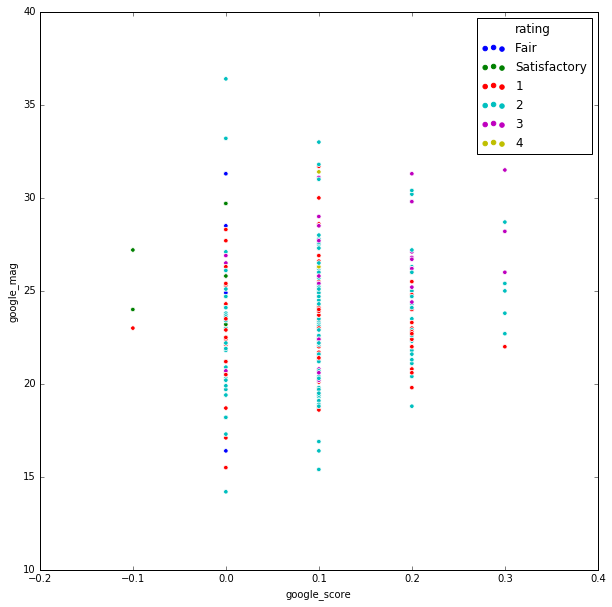

In [47]:
sns.scatterplot(x="google_score", y="google_mag", data=data,
                hue="rating", hue_order = ["Fair", "Satisfactory","1", "2", "3", "4"] )

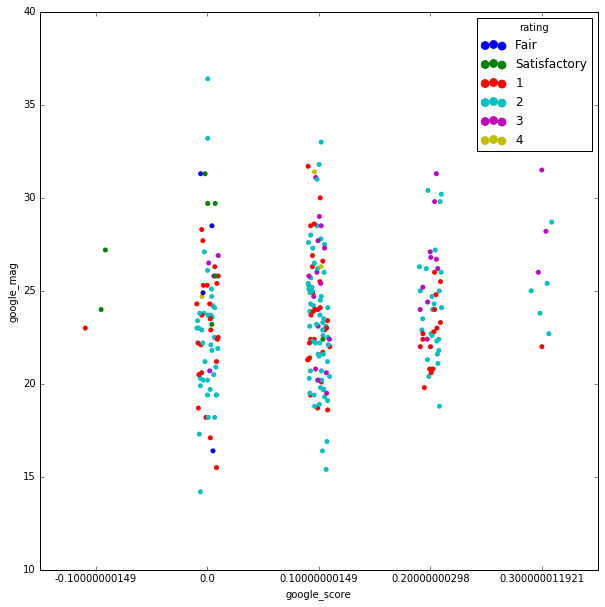

In [48]:
sns.stripplot(x="google_score", y="google_mag", data=data,
                hue="rating", hue_order = ["Fair", "Satisfactory","1", "2", "3", "4"])

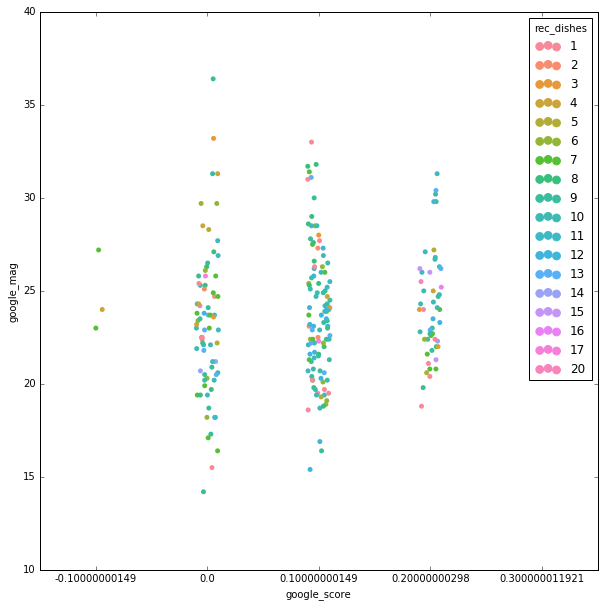

In [64]:
sns.stripplot(x="google_score", y="google_mag", hue = "rec_dishes", data=data)

There's not really any obvious correlations. 

### Building a model

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [30]:
X = data[['google_mag2', 'google_score2']]
Y = data['rating']

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)

In [39]:
model_A = LogisticRegression().fit(X_train,Y_train)
training_accuracy = accuracy_score(Y_train, model_A.predict(X_train))
testing_accuracy = accuracy_score(Y_test, model_A.predict(X_test))
print("Training Accuracy: %f" % training_accuracy)
print("Testing Accuracy: %f" % testing_accuracy)

Training Accuracy: 0.532967
Testing Accuracy: 0.475410


In [40]:
model_B = LogisticRegression(multi_class = 'multinomial', solver='newton-cg').fit(X_train,Y_train)
training_accuracy = accuracy_score(Y_train, model_B.predict(X_train))
testing_accuracy = accuracy_score(Y_test, model_B.predict(X_test))
print("Training Accuracy: %f" % training_accuracy)
print("Testing Accuracy: %f" % testing_accuracy)

Training Accuracy: 0.527473
Testing Accuracy: 0.459016


In [17]:
set(model_A.predict(X))

{'★★'}

In [16]:
model_A.predict_proba(X_test)[0]

array([ 0.05200914,  0.05521885,  0.30446568,  0.44282185,  0.0987497 ,
        0.04673478])

In [32]:
table/sum(table)

rating
Fair            0.016461
Satisfactory    0.032922
★               0.288066
★★              0.518519
★★★             0.131687
★★★★            0.012346
dtype: float64

The model's predictions basically just match the observed probabilities in the data set. We're not learning anything here.  This model seems to support our hypothesis.

Idea - check this with simulation? What if we randomly shuffle the models?

In [20]:
#Temporary
# This isn't a good model - price is really a categorical variable, so need to encode that
# It was worth it just to see, though
# maybe use "onehotencoder" - look into that
XC = data[['google_mag2', 'google_score2', 'price', 'rec_dishes']]
YC = data['rating']
XC_train, XC_test, YC_train, YC_test = train_test_split(XC, YC, random_state = 0)
model_C = LogisticRegression().fit(XC_train,YC_train)
training_accuracy = accuracy_score(YC_train, model_C.predict(XC_train))
testing_accuracy = accuracy_score(YC_test, model_C.predict(XC_test))
print("Training Accuracy: %f" % training_accuracy)
print("Testing Accuracy: %f" % testing_accuracy)

Training Accuracy: 0.538462
Testing Accuracy: 0.475410


In [21]:
set(model_C.predict(XC))

{'★', '★★'}

In [22]:
#Temporary
# This isn't a good model - price is really a categorical variable, so need to encode that
# It was worth it just to see, though
# maybe use "onehotencoder" - look into that
XD = data[[ 'price', 'rec_dishes']]
YD = data['rating']
XD_train, XD_test, YD_train, YD_test = train_test_split(XD, YD, random_state = 0)
model_D = LogisticRegression().fit(XD_train,YD_train)
training_accuracy = accuracy_score(YD_train, model_D.predict(XD_train))
testing_accuracy = accuracy_score(YD_test, model_D.predict(XD_test))
print("Training Accuracy: %f" % training_accuracy)
print("Testing Accuracy: %f" % testing_accuracy)

Training Accuracy: 0.543956
Testing Accuracy: 0.475410


In [23]:
set(model_D.predict(XD))

{'★', '★★'}

In [25]:
len([x for x in model_D.predict(XD) if x == '★'])

4

In [28]:
XD = data[[ 'price', 'rec_dishes']]
YD = data['rating']
XD_train, XD_test, YD_train, YD_test = train_test_split(XD, YD, random_state = 0)
model_E = RandomForestClassifier().fit(XD_train,YD_train)
training_accuracy = accuracy_score(YD_train, model_E.predict(XD_train))
testing_accuracy = accuracy_score(YD_test, model_E.predict(XD_test))
print("Training Accuracy: %f" % training_accuracy)
print("Testing Accuracy: %f" % testing_accuracy)

Training Accuracy: 0.598901
Testing Accuracy: 0.459016


In [29]:
XC = data[['google_mag2', 'google_score2', 'price', 'rec_dishes']]
YC = data['rating']
XC_train, XC_test, YC_train, YC_test = train_test_split(XC, YC, random_state = 0)
model_F = RandomForestClassifier().fit(XC_train,YC_train)
training_accuracy = accuracy_score(YC_train, model_F.predict(XC_train))
testing_accuracy = accuracy_score(YC_test, model_F.predict(XC_test))
print("Training Accuracy: %f" % training_accuracy)
print("Testing Accuracy: %f" % testing_accuracy)

Training Accuracy: 0.950549
Testing Accuracy: 0.524590


In [32]:
model_F = RandomForestClassifier().fit(X_train,Y_train)
training_accuracy = accuracy_score(Y_train, model_F.predict(X_train))
testing_accuracy = accuracy_score(Y_test, model_F.predict(X_test))
print("Training Accuracy: %f" % training_accuracy)
print("Testing Accuracy: %f" % testing_accuracy)

Training Accuracy: 0.807692
Testing Accuracy: 0.393443


In [42]:
table2 = YC_test.groupby(YC_test).size()

In [43]:
table2/sum(table2)

rating
Satisfactory    0.032787
★               0.327869
★★              0.475410
★★★             0.147541
★★★★            0.016393
dtype: float64